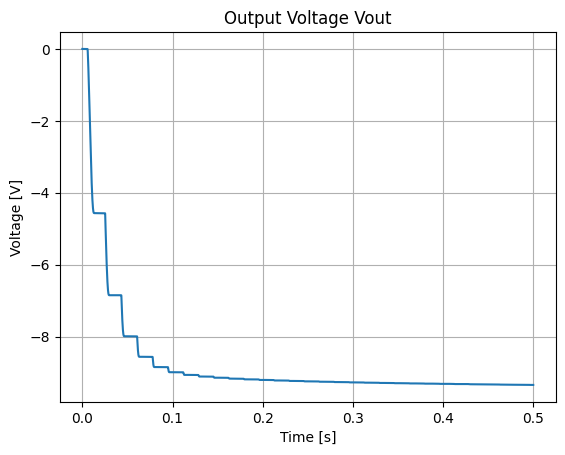

In [2]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *
import matplotlib.pyplot as plt

# Define the circuit
circuit = Circuit('Voltage Doubler with D1N4148 Diodes')

# Include the .mod file for the 1N4148 diode
circuit.include('1N4148.mod')

# Define the input sine wave with 5V amplitude and 60Hz frequency
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=5@u_V, frequency=60@u_Hz)

# Define capacitors
circuit.C(1, 'input', 'mid', 1@u_uF)
circuit.C(2, 'out', circuit.gnd, 1@u_uF)

# Use the diode model from the .mod file (D1N4148), using 'D()' instead of 'X()'
circuit.D(1, 'mid', circuit.gnd, model='D1N4148')  # D1
circuit.D(2, 'out', 'mid', model='D1N4148')  # D2

# Run the transient simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_us, end_time=500@u_ms)

# Plot the output voltage V(out)
figure, ax = plt.subplots()
plot(analysis['out'], axis=ax)
plt.title('Output Voltage Vout')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.show()

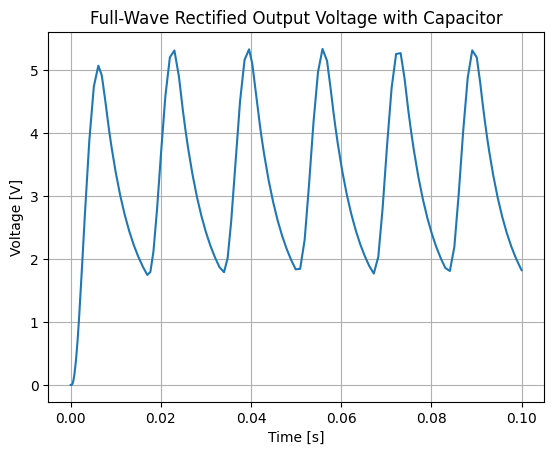

In [3]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
import matplotlib.pyplot as plt

# Create the circuit
circuit = Circuit('Full Wave Rectifier with Capacitor')
# Include the .mod file for the 1N4148 diode
circuit.include('1N4148.mod')

# Define the input voltage (120V AC to step down to ~14V AC)
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=14@u_V, frequency=60@u_Hz)

# Define the bridge rectifier diodes (1N4148)
circuit.D(1, 'input', 'mid1', model='D1N4148')
circuit.D(2, 'mid1', circuit.gnd, model='D1N4148')
circuit.D(3, 'input', 'mid2', model='D1N4148')
circuit.D(4, 'mid2', circuit.gnd, model='D1N4148')

# Add the capacitor to smooth the output
circuit.C(1, 'mid1', circuit.gnd, 8333@u_uF)

# Define a load resistor to simulate the load
circuit.R(1, 'mid1', 'mid2', 10@u_Ohm)

# Run the simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_ms, end_time=0.1@u_s)

# Plot the output voltage
figure, ax = plt.subplots()
plot(analysis['mid1'], axis=ax)
plt.title('Full-Wave Rectified Output Voltage with Capacitor')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(True)
plt.show()


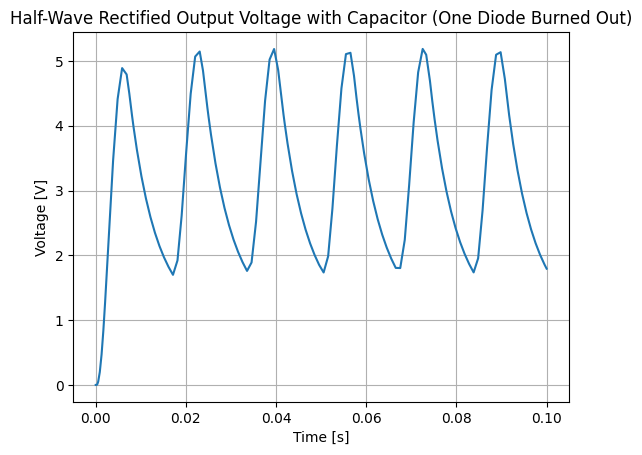

In [4]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
import matplotlib.pyplot as plt

# Create the circuit
circuit = Circuit('Half-Wave Rectifier with Capacitor')
# Include the .mod file for the 1N4148 diode
circuit.include('1N4148.mod')

# Define the input voltage (120V AC to step down to ~14V AC)
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=14@u_V, frequency=60@u_Hz)

# Define the half-bridge rectifier diodes (1N4148), omitting one diode to simulate a burn-out
circuit.D(1, 'input', 'mid1', model='D1N4148')
circuit.D(2, 'mid1', circuit.gnd, model='D1N4148')
# Omit the third diode to simulate a burn-out
# circuit.D(3, 'input', 'mid2', model='D1N4148')  # This is intentionally omitted
circuit.D(4, 'mid2', circuit.gnd, model='D1N4148')

# Add the capacitor to smooth the output
circuit.C(1, 'mid1', circuit.gnd, 8333@u_uF)

# Define a load resistor to simulate the load
circuit.R(1, 'mid1', 'mid2', 10@u_Ohm)

# Run the simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_ms, end_time=0.1@u_s)

# Plot the output voltage
figure, ax = plt.subplots()
plot(analysis['mid1'], axis=ax)
plt.title('Half-Wave Rectified Output Voltage with Capacitor (One Diode Burned Out)')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(True)
plt.show()


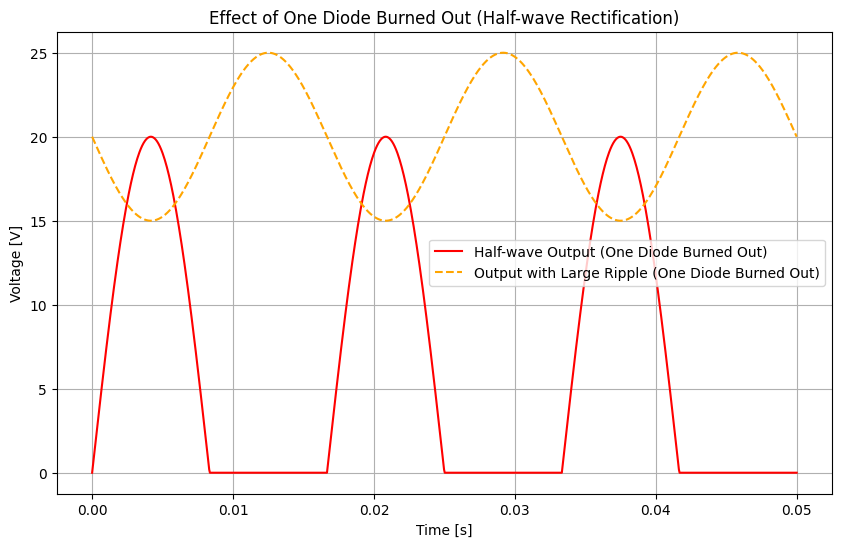

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis (50ms for visualization purposes)
t = np.linspace(0, 0.05, 1000)

# Parameters for the simulation
V_peak = 20  # Peak voltage for output without capacitor
f = 60  # Input AC frequency (60Hz full-wave gives 120Hz ripple after rectification)
omega = 2 * np.pi * f  # Angular frequency for half-wave rectified AC (one diode out)

# Half-wave rectified output (effect of one diode burned out)
output_half_wave = V_peak * np.maximum(0, np.sin(omega * t))  # Only positive half of the AC cycle

# DC output with large ripple (effect of one diode burned out)
output_with_large_ripple = V_peak - 5 * np.sin(omega * t)  # Larger ripple due to only half-wave rectification

# Plot the graphs
plt.figure(figsize=(10, 6))

# Half-wave rectified output with one diode burned out
plt.plot(t, output_half_wave, label="Half-wave Output (One Diode Burned Out)", color='red')

# Output with large ripple due to half-wave rectification
plt.plot(t, output_with_large_ripple, label="Output with Large Ripple (One Diode Burned Out)", color='orange', linestyle='--')

# Add labels and title
plt.title("Effect of One Diode Burned Out (Half-wave Rectification)")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
